In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import beta
from scipy.stats import bernoulli
from IPython import display
import time

---
Coin Tossing and Conjugacy
=====
***

In [21]:
#N = 500
#heads = data[:].sum()
#print data[:N]
#print data[:].sum()

[0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1
 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0
 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0
 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0
 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1
 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0
 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1
 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0
 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0
 0 0 1 1 1 0 0 0 1 1 0 0 

####Specify a Beta Distribution for the mean, i.e. is the coin fair??

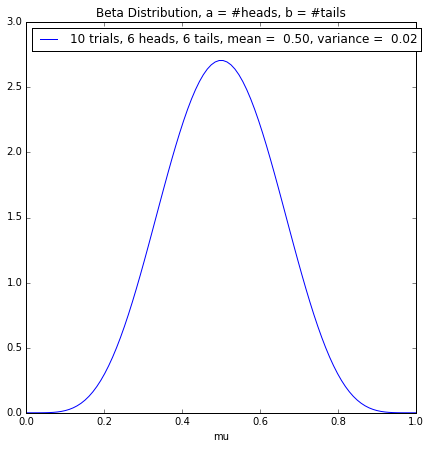

In [2]:
x = np.linspace(0, 1, 100)
N=10
heads = 5
y = beta.pdf(x, 1 + heads, 1 + N - heads)


fig = plt.figure(figsize = (7, 7))
ax = plt.subplot(111)
ax.set_title("Beta Distribution, a = #heads, b = #tails")
ax.set_xlabel("mu")
mn, va = beta.stats(1+heads, 1+N-heads, moments = 'mv')
lstr = "{:d} trials, {:d} heads, {:d} tails, mean = {:5.2f}, variance = {:5.2f}".format(int(N), \
                                                                                        int(1+heads),\
                                                                                        int(1+N-heads),\
                                                                                        float(mn), float(va))
ax.plot(x, y, label=lstr)
ax.legend(loc="upper left")

####Let's now run iterative Bayes

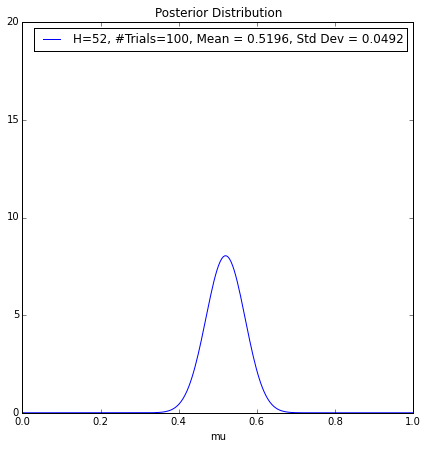

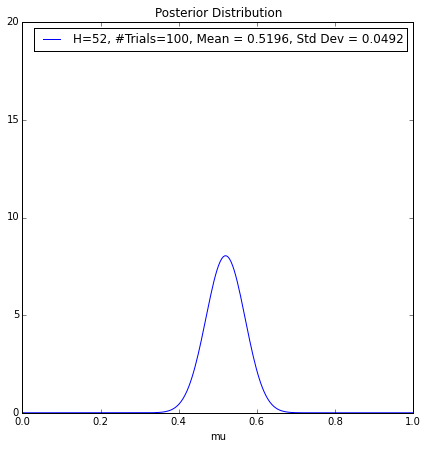

In [5]:
#You can ajust the fairness of your coin here
prior = 0.5

x_plot = np.linspace(0, 1, 250)
fig = plt.figure(figsize = (7, 7))
ax = plt.subplot(111)

trial_counter = 0
heads = 0
i=0

for p in xrange(100):
    plt.cla()
    display.clear_output(wait=True)
    
    #Get the likelihood, a single trial of the bernoulli distribution, to get a head or a tail
    data = bernoulli.rvs(prior, size=1)
    
    #accumulate heads (meaning updata a, and by definition b as well)
    heads += data[:].sum()
    
    #record the numberof trials
    trial_counter += 1   

    #obviously we can work out the number of tails
    tails = trial_counter - heads
    
    #The posterior is the likelihood x the prior, or updating a, and b; heads and tails in this case
    y = beta.pdf(x_plot, 1 + heads, 1 + tails)
    
    #get the mean and variance of the posterior
    the_mean, the_variance = beta.stats(1 + heads, 1 + tails, moments='mv')
    lstr = "H={:d}, #Trials={:d}, Mean = {:5.4f}, Std Dev = {:5.4f}".format(heads, trial_counter, \
                                                                            float(the_mean), np.sqrt(the_variance))

    ax.plot(x_plot, y, label = lstr)
    ax.set_title("Posterior Distribution")
    ax.set_xlabel("mu")
    ax.legend()
    ax.set_ylim(0, 20)
    display.display(plt.gcf())
    time.sleep(0.1)
    #raw_input('>>>')
    

#####From Probabilistic Programming and Bayesian Methods for Hackers

In [14]:
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]

#run 500 trials and store the results in data
data = bernoulli.rvs(0.5, size=n_trials[-1])

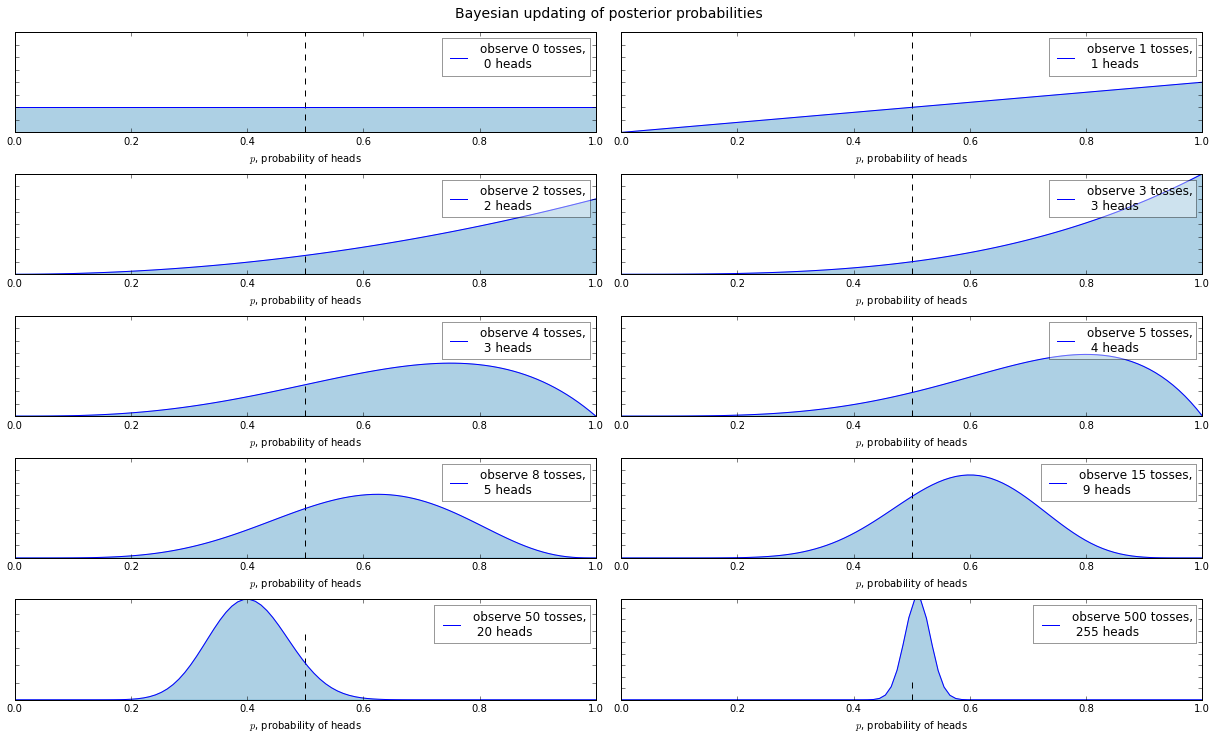

In [18]:
fig = plt.figure(figsize = (17,10))

for k, N in enumerate(n_trials):
    #a nice way of automatically laying out the plots
    sx = plt.subplot(len(n_trials) / 2, 2, k + 1)

    plt.xlabel("$p$, probability of heads") 
    
    plt.setp(sx.get_yticklabels(), visible=False)
    
    heads = data[:N].sum()
    
    y = beta.pdf(x, 1 + heads, 1 + N - heads)
    
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()